In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filehandle = 'ProjectData/daily_dataset.csv/daily_dataset.csv'
energydata = pd.read_csv(filehandle)

In [3]:
energydata.drop(['energy_median','energy_count'], inplace = True, axis =1)

In [4]:
filehandle = 'ProjectData/uk_bank_holidays.csv'
holidays = pd.read_csv(filehandle)
holidays.head()


,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)
4,2012-04-06,Spring bank holiday (substitute day)


In [5]:
#'2012-12-25' in holidays['Bank holidays'].any()

In [6]:
energydata.loc[energydata.day == holidays['Bank holidays'][1]]

,LCLid,day,energy_mean,energy_max,energy_std,energy_sum,energy_min
376,MAC000131,2012-12-25,0.245167,0.835,0.214254,11.768,0.065
1183,MAC000132,2012-12-25,0.504875,1.556,0.405930,24.234,0.093
2004,MAC000221,2012-12-25,0.064000,0.107,0.021147,3.072,0.028
2825,MAC000228,2012-12-25,0.180062,1.444,0.207368,8.643,0.030
3646,MAC000234,2012-12-25,0.175854,0.707,0.130390,8.441,0.039
...,...,...,...,...,...,...,...
3506926,MAC004926,2012-12-25,0.025917,0.032,0.003059,1.244,0.023
3507697,MAC004932,2012-12-25,0.772542,2.056,0.506939,37.082,0.121
3508468,MAC004937,2012-12-25,0.131125,0.217,0.038756,6.294,0.072
3509236,MAC004965,2012-12-25,0.250437,0.617,0.171721,12.021,0.032


In [7]:
# idea make a dummy not interested in which holiday is more, but perhaps it could become feature of model to know whether is a holiday
big_data_set = energydata

In [8]:
#big_data_set['Holiday'] = [1 for date in energydata.day if date in holidays['Bank holidays'] else 0] # 1 if holiday
#[1 if date in holidays['Bank holidays'] else 0 for date in energydata.day]
big_data_set['holiday'] = 0

for date in holidays['Bank holidays']:
    frame = big_data_set.loc[energydata.day == date].index
    
    for index in frame:
        big_data_set.at[index,'holiday'] =1

In [9]:
# big_data_set.loc[big_data_set['day'] == '2012-12-23']

In [10]:
big_data_set

,LCLid,day,energy_mean,energy_max,energy_std,energy_sum,energy_min,holiday
0,MAC000131,2011-12-15,0.432045,0.868,0.239146,9.505,0.072,0
1,MAC000131,2011-12-16,0.296167,1.116,0.281471,14.216,0.031,0
2,MAC000131,2011-12-17,0.189812,0.685,0.188405,9.111,0.064,0
3,MAC000131,2011-12-18,0.218979,0.676,0.202919,10.511,0.065,0
4,MAC000131,2011-12-19,0.325979,0.788,0.259205,15.647,0.066,0
...,...,...,...,...,...,...,...,...
3510428,MAC004977,2014-02-24,0.118458,0.580,0.093814,5.686,0.052,0
3510429,MAC004977,2014-02-25,0.084208,0.176,0.037107,4.042,0.046,0
3510430,MAC004977,2014-02-26,0.120500,0.282,0.069332,5.784,0.046,0
3510431,MAC004977,2014-02-27,0.114062,0.431,0.094482,5.475,0.047,0


In [11]:
# ACorn?
filehandle = 'ProjectData/informations_households.csv'
acron_data = pd.read_csv(filehandle)
acron_data.drop('file', inplace = True, axis =1)
acron_data


,LCLid,stdorToU,Acorn,Acorn_grouped
0,MAC005492,ToU,ACORN-,ACORN-
1,MAC001074,ToU,ACORN-,ACORN-
2,MAC000002,Std,ACORN-A,Affluent
3,MAC003613,Std,ACORN-A,Affluent
4,MAC003597,Std,ACORN-A,Affluent
...,...,...,...,...
5561,MAC002056,Std,ACORN-U,ACORN-U
5562,MAC004587,Std,ACORN-U,ACORN-U
5563,MAC004828,Std,ACORN-U,ACORN-U
5564,MAC001704,ToU,ACORN-U,ACORN-U


In [12]:
# match on MAC_id
big_data_set = big_data_set.merge(acron_data, on = 'LCLid', how = 'left')


In [13]:
big_data_set

,LCLid,day,energy_mean,energy_max,energy_std,energy_sum,energy_min,holiday,stdorToU,Acorn,Acorn_grouped
0,MAC000131,2011-12-15,0.432045,0.868,0.239146,9.505,0.072,0,Std,ACORN-E,Affluent
1,MAC000131,2011-12-16,0.296167,1.116,0.281471,14.216,0.031,0,Std,ACORN-E,Affluent
2,MAC000131,2011-12-17,0.189812,0.685,0.188405,9.111,0.064,0,Std,ACORN-E,Affluent
3,MAC000131,2011-12-18,0.218979,0.676,0.202919,10.511,0.065,0,Std,ACORN-E,Affluent
4,MAC000131,2011-12-19,0.325979,0.788,0.259205,15.647,0.066,0,Std,ACORN-E,Affluent
...,...,...,...,...,...,...,...,...,...,...,...
3510428,MAC004977,2014-02-24,0.118458,0.580,0.093814,5.686,0.052,0,ToU,ACORN-E,Affluent
3510429,MAC004977,2014-02-25,0.084208,0.176,0.037107,4.042,0.046,0,ToU,ACORN-E,Affluent
3510430,MAC004977,2014-02-26,0.120500,0.282,0.069332,5.784,0.046,0,ToU,ACORN-E,Affluent
3510431,MAC004977,2014-02-27,0.114062,0.431,0.094482,5.475,0.047,0,ToU,ACORN-E,Affluent


## Weather

In [14]:
df_weather_daily = pd.read_csv("~/Documents/GitHub/CS512/CS512/ProjectData/weather_daily_darksky.csv")

def split_columns_weather(old_column_name,column_name_date,column_name_var,df_weather):
    df_weather[[column_name_date, column_name_var]] = df_weather[old_column_name].str.split(' ', 1, expand=True)
    df_weather.drop(old_column_name, axis=1, inplace=True)
    df_weather.drop(column_name_date, axis=1, inplace=True)
    
split_columns_weather('temperatureMinTime','Date','TemperatureMinTime',df_weather_daily)
split_columns_weather('temperatureMaxTime','Date','Temperature_max_time',df_weather_daily)
split_columns_weather('apparentTemperatureMinTime','Date','ApparentTemperatureMinTime',df_weather_daily)
split_columns_weather('apparentTemperatureMaxTime','Date','ApparentTemperatureMaxTime',df_weather_daily)
split_columns_weather('apparentTemperatureLowTime','Date','ApparentTemperatureLowTime',df_weather_daily)
split_columns_weather('apparentTemperatureHighTime','Date','ApparentTemperatureHighTime',df_weather_daily)
split_columns_weather('temperatureLowTime','Date','TemperatureLowTime',df_weather_daily)
split_columns_weather('temperatureHighTime','Date','TemperatureHighTime',df_weather_daily)
split_columns_weather('sunsetTime','Date','SunsetTime',df_weather_daily)
df_weather_daily[['date','SunriseTime']] = df_weather_daily['sunriseTime'].str.split(' ', 1, expand=True)
df_weather_daily.drop('sunriseTime', axis=1, inplace=True)

df_weather_daily.sort_values('date',inplace=True)

In [15]:
df_weather_daily.rename({'date':'day'}, inplace=True, axis=1)
df_weather_daily

,temperatureMax,windBearing,icon,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,precipType,visibility,...,Temperature_max_time,ApparentTemperatureMinTime,ApparentTemperatureMaxTime,ApparentTemperatureLowTime,ApparentTemperatureHighTime,TemperatureLowTime,TemperatureHighTime,SunsetTime,day,SunriseTime
13,15.57,208,partly-cloudy-day,10.13,0.36,2.45,1009.46,15.57,rain,12.68,...,15:00:00,22:00:00,15:00:00,03:00:00,15:00:00,03:00:00,15:00:00,16:36:03,2011-11-01,06:54:29
60,15.19,134,partly-cloudy-night,10.23,0.39,4.39,1004.79,15.06,rain,11.83,...,23:00:00,03:00:00,23:00:00,19:00:00,13:00:00,19:00:00,13:00:00,16:34:15,2011-11-02,06:56:16
34,17.41,154,partly-cloudy-day,13.39,0.52,3.99,993.40,17.41,rain,12.15,...,14:00:00,21:00:00,14:00:00,07:00:00,14:00:00,07:00:00,14:00:00,16:32:29,2011-11-03,06:58:03
31,15.54,179,fog,12.03,0.50,2.62,995.54,15.54,rain,10.69,...,11:00:00,23:00:00,11:00:00,02:00:00,11:00:00,02:00:00,11:00:00,16:30:44,2011-11-04,06:59:49
46,13.94,346,fog,10.96,0.65,2.70,1007.39,13.94,rain,4.60,...,15:00:00,02:00:00,15:00:00,06:00:00,15:00:00,05:00:00,15:00:00,16:29:01,2011-11-05,07:01:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,10.04,75,fog,2.08,0.44,2.36,1012.88,10.04,rain,8.19,...,13:00:00,06:00:00,13:00:00,03:00:00,13:00:00,03:00:00,13:00:00,18:25:26,2014-03-27,05:48:40
876,12.43,87,fog,3.67,0.19,3.31,1014.82,12.43,rain,6.24,...,14:00:00,03:00:00,14:00:00,02:00:00,14:00:00,01:00:00,14:00:00,18:27:06,2014-03-28,05:46:23
867,18.47,105,clear-day,5.37,0.08,4.19,1014.25,18.47,rain,8.59,...,14:00:00,02:00:00,14:00:00,04:00:00,14:00:00,05:00:00,14:00:00,18:28:46,2014-03-29,05:44:05
830,19.82,114,partly-cloudy-day,5.81,0.31,2.18,1013.04,19.82,rain,11.56,...,12:00:00,04:00:00,12:00:00,06:00:00,12:00:00,06:00:00,12:00:00,18:30:25,2014-03-30,05:41:48


In [16]:
big_data_set = big_data_set.merge(df_weather_daily, on = 'day', how = 'left')

In [17]:
big_data_set

,LCLid,day,energy_mean,energy_max,energy_std,energy_sum,energy_min,holiday,stdorToU,Acorn,...,TemperatureMinTime,Temperature_max_time,ApparentTemperatureMinTime,ApparentTemperatureMaxTime,ApparentTemperatureLowTime,ApparentTemperatureHighTime,TemperatureLowTime,TemperatureHighTime,SunsetTime,SunriseTime
0,MAC000131,2011-12-15,0.432045,0.868,0.239146,9.505,0.072,0,Std,ACORN-E,...,00:00:00,14:00:00,00:00:00,21:00:00,08:00:00,14:00:00,08:00:00,14:00:00,15:52:48,08:00:46
1,MAC000131,2011-12-16,0.296167,1.116,0.281471,14.216,0.031,0,Std,ACORN-E,...,08:00:00,00:00:00,10:00:00,00:00:00,08:00:00,15:00:00,08:00:00,15:00:00,15:52:56,08:01:35
2,MAC000131,2011-12-17,0.189812,0.685,0.188405,9.111,0.064,0,Std,ACORN-E,...,08:00:00,14:00:00,08:00:00,15:00:00,06:00:00,15:00:00,07:00:00,14:00:00,15:53:06,08:02:21
3,MAC000131,2011-12-18,0.218979,0.676,0.202919,10.511,0.065,0,Std,ACORN-E,...,23:00:00,14:00:00,06:00:00,14:00:00,02:00:00,14:00:00,01:00:00,14:00:00,15:53:20,08:03:04
4,MAC000131,2011-12-19,0.325979,0.788,0.259205,15.647,0.066,0,Std,ACORN-E,...,01:00:00,19:00:00,02:00:00,19:00:00,08:00:00,19:00:00,04:00:00,19:00:00,15:53:38,08:03:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3510428,MAC004977,2014-02-24,0.118458,0.580,0.093814,5.686,0.052,0,ToU,ACORN-E,...,07:00:00,13:00:00,08:00:00,13:00:00,03:00:00,13:00:00,03:00:00,13:00:00,17:32:15,06:58:05
3510429,MAC004977,2014-02-25,0.084208,0.176,0.037107,4.042,0.046,0,ToU,ACORN-E,...,21:00:00,00:00:00,11:00:00,00:00:00,07:00:00,14:00:00,07:00:00,14:00:00,17:34:02,06:55:59
3510430,MAC004977,2014-02-26,0.120500,0.282,0.069332,5.784,0.046,0,ToU,ACORN-E,...,07:00:00,13:00:00,07:00:00,13:00:00,00:00:00,13:00:00,00:00:00,13:00:00,17:35:49,06:53:52
3510431,MAC004977,2014-02-27,0.114062,0.431,0.094482,5.475,0.047,0,ToU,ACORN-E,...,23:00:00,14:00:00,22:00:00,14:00:00,02:00:00,14:00:00,02:00:00,14:00:00,17:37:35,06:51:45


In [18]:
big_data_set.to_pickle('ProjectData/bigdataset.pkl')

# Trying to merge Acorn data


In [19]:
filehandle = 'ProjectData/acorn_details.csv'
acorn_props = pd.read_csv(filehandle)
acorn_props

,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,POPULATION,Age,Age 0-4,77.0,83.0,72.0,100.0,120.0,77.0,97.0,97.0,63.0,119.0,67.0,114.0,113.0,89.0,123.0,138.0,133.0
1,POPULATION,Age,Age 5-17,117.0,109.0,87.0,69.0,94.0,95.0,102.0,106.0,67.0,95.0,64.0,108.0,116.0,86.0,89.0,136.0,106.0
2,POPULATION,Age,Age 18-24,64.0,73.0,67.0,107.0,100.0,71.0,83.0,89.0,62.0,104.0,459.0,97.0,96.0,86.0,117.0,109.0,110.0
3,POPULATION,Age,Age 25-34,52.0,63.0,62.0,197.0,151.0,66.0,90.0,88.0,63.0,132.0,145.0,109.0,96.0,90.0,140.0,120.0,120.0
4,POPULATION,Age,Age 35-49,102.0,105.0,91.0,124.0,118.0,93.0,102.0,103.0,76.0,111.0,67.0,99.0,98.0,90.0,102.0,103.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,LEISURE TIME,Holiday Destination/Type,Asia,171.0,137.0,94.0,220.0,196.0,69.0,122.0,95.0,72.0,97.0,124.0,73.0,57.0,49.0,96.0,113.0,63.0
822,LEISURE TIME,Holiday Destination/Type,Activity / Outdoor Sports,298.0,278.0,138.0,119.0,93.0,96.0,113.0,96.0,84.0,96.0,56.0,48.0,48.0,46.0,23.0,23.0,23.0
823,LEISURE TIME,Holiday Destination/Type,Cruise,272.0,295.0,272.0,44.0,44.0,70.0,70.0,70.0,70.0,70.0,28.0,28.0,28.0,28.0,49.0,49.0,49.0
824,LEISURE TIME,Holiday Destination/Type,Package,196.0,186.0,166.0,49.0,49.0,101.0,101.0,121.0,106.0,101.0,48.0,75.0,75.0,75.0,54.0,54.0,54.0


Data gets more and more specyific, (down to individual level questions) were some things would not make sense to test for all these things. Therefore start with higher level heatmap maybe extend afterwards if some variables somehow super correlated.

In [20]:
acorn_props['MAIN CATEGORIES'].unique()

array(['POPULATION', 'HOUSING', 'FAMILY', 'ECONOMY', 'EDUCATION',
       'HEALTH', 'TRANSPORT', 'MARKETING CHANNELS', 'FINANCE', 'DIGITAL',
       'SHOPPING', 'CONTACT', 'ENVIRONMENT', 'COMMUNITY SAFETY',
       'LEISURE TIME'], dtype=object)

In [21]:
acorn_props['CATEGORIES'].unique()

array(['Age', 'Geography', 'Ethnicity', 'Country of Birth', 'Religion',
       'House Type', 'House Tenure', 'House Size', 'House Value',
       'Moving House', 'Structure', 'Children in household',
       'Household Size', 'Economic Activity',
       'NS Socio-Economic Classifications', 'Social Grade', 'Occupation',
       'Highest Level of Qualifications (Adults)',
       'England: Pupils at the end of KS1',
       'England: Pupils at the end of KS2',
       'England: Pupils at the end of KS4',
       'Scotland: Pupils in the S4 cohort',
       'Scotland: Pupils in the S5 cohort', 'Behaviours & Lifestyle',
       'Travel To Work', 'Public Transport Accessibility Level',
       'Car Ownership', 'Main Car Class', 'Channels Received',
       'Future Responses', 'Household Annual Income',
       'Financial Attitudes', 'Financial Situation', 'Benefits',
       'Credit Cards', 'Savings and Investments', 'Loans',
       'Insurance and Pensions',
       'Financial Channel: Arrange Current Ac

In [22]:
#acorn_props['REFERENCE'].unique() # uncomment to see details, but really low level

In [23]:
acorn_props = acorn_props.drop(columns=['MAIN CATEGORIES', 'REFERENCE'])

In [24]:
acorn_props_t = acorn_props.transpose()
acorn_props_t.columns = acorn_props['CATEGORIES']
acorn_props_t = acorn_props_t.iloc[1:,:]
acorn_props_t

CATEGORIES,Age,Age,Age,Age,Age,Age,Age,Age,Geography,Geography,...,Holiday Destination/Type,Holiday Destination/Type,Holiday Destination/Type,Holiday Destination/Type,Holiday Destination/Type,Holiday Destination/Type,Holiday Destination/Type,Holiday Destination/Type,Holiday Destination/Type,Holiday Destination/Type
ACORN-A,77.0,117.0,64.0,52.0,102.0,124.0,125.0,112.0,107.0,30.0,...,402.0,2280.0,133.0,3795.0,2652.0,171.0,298.0,272.0,196.0,308.0
ACORN-B,83.0,109.0,73.0,63.0,105.0,121.0,120.0,103.0,101.0,95.0,...,149.0,344.0,150.0,116.0,126.0,137.0,278.0,295.0,186.0,181.0
ACORN-C,72.0,87.0,67.0,62.0,91.0,120.0,152.0,157.0,103.0,45.0,...,85.0,79.0,150.0,116.0,88.0,94.0,138.0,272.0,166.0,181.0
ACORN-D,100.0,69.0,107.0,197.0,124.0,72.0,55.0,49.0,114.0,2.0,...,214.0,84.0,153.0,58.0,424.0,220.0,119.0,44.0,49.0,55.0
ACORN-E,120.0,94.0,100.0,151.0,118.0,82.0,61.0,57.0,106.0,49.0,...,171.0,56.0,128.0,58.0,108.0,196.0,93.0,44.0,49.0,55.0
ACORN-F,77.0,95.0,71.0,66.0,93.0,126.0,144.0,117.0,75.0,462.0,...,97.0,62.0,81.0,58.0,59.0,69.0,96.0,70.0,101.0,127.0
ACORN-G,97.0,102.0,83.0,90.0,102.0,109.0,108.0,98.0,107.0,53.0,...,97.0,62.0,137.0,58.0,59.0,122.0,113.0,70.0,101.0,147.0
ACORN-H,97.0,106.0,89.0,88.0,103.0,107.0,104.0,96.0,106.0,104.0,...,61.0,51.0,114.0,58.0,59.0,95.0,96.0,70.0,121.0,124.0
ACORN-I,63.0,67.0,62.0,63.0,76.0,112.0,182.0,220.0,102.0,30.0,...,97.0,62.0,112.0,58.0,59.0,72.0,84.0,70.0,106.0,113.0
ACORN-J,119.0,95.0,104.0,132.0,111.0,90.0,72.0,66.0,106.0,91.0,...,97.0,62.0,112.0,58.0,59.0,97.0,96.0,70.0,101.0,166.0


In [25]:
acorn_props_t = acorn_props_t.astype(int)

<AxesSubplot:xlabel='CATEGORIES'>

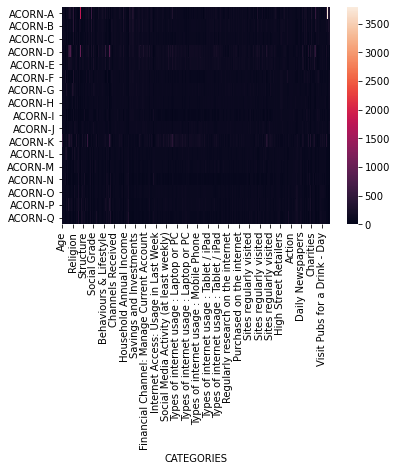

In [26]:
sns.heatmap(acorn_props_t)

In [115]:
# try to get average/std of each acorn then heatmap
acorn_per_type = pd.DataFrame(index = big_data_set.Acorn.unique(), dtype=float, columns = ['Mean','Std','Max','Min','Sum'])

for acorn in big_data_set.Acorn.unique():
    subset = big_data_set.loc[big_data_set['Acorn']== acorn]
    
    # store 
    acorn_per_type.at[acorn,'Mean'] = subset['energy_mean'].mean()
    acorn_per_type.at[acorn,'Std'] = subset['energy_std'].mean() # take mean now?
    acorn_per_type.at[acorn,'Max'] = subset['energy_max'].mean()
    acorn_per_type.at[acorn,'Min'] = subset['energy_min'].mean()
    acorn_per_type.at[acorn,'Sum'] = subset['energy_sum'].mean()
    

acorn_per_type # drop acorn u as not in dataset??

,Mean,Std,Max,Min,Sum
ACORN-E,0.216489,0.181982,0.858205,0.059821,10.353099
ACORN-N,0.192737,0.157081,0.783825,0.052618,9.218043
ACORN-H,0.230077,0.180500,0.876133,0.064375,11.007658
ACORN-P,0.138781,0.161606,0.762295,0.024555,6.611038
ACORN-F,0.192197,0.150370,0.746185,0.055726,9.191454
ACORN-K,0.209264,0.167095,0.821007,0.056725,10.006530
ACORN-Q,0.158281,0.133888,0.671400,0.042138,7.564822
ACORN-I,0.197336,0.162683,0.802434,0.057151,9.439643
ACORN-L,0.209601,0.170713,0.838500,0.058469,10.028332
ACORN-D,0.283882,0.213324,0.996430,0.086124,13.578131


<AxesSubplot:>

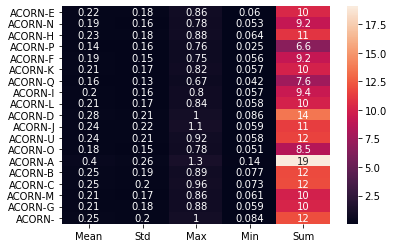

In [116]:
sns.heatmap(acorn_per_type, annot=True)

<AxesSubplot:>

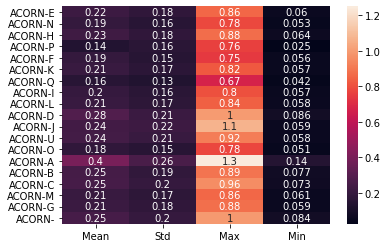

In [121]:
# without sum is more usefull as magnitude of sum and (max is way bigger)
sns.heatmap(acorn_per_type.drop('Sum', axis=1), annot=True)


In [117]:
# f, ax = plt.subplots(dpi =300)
# sns.heatmap(acorn_props_t.corr(), ax=ax) # not sousefull plot

In [118]:
# try at high level?
acorn_props_t['Mean'] = 0
acorn_props_t['Std'] = 0

for acorn in acorn_per_type.index:
    if acorn not in acorn_props_t.index:
        pass
    else:
        # in index
        acorn_props_t.at[acorn,'Mean'] = acorn_per_type.at[acorn,'Mean']
        acorn_props_t.at[acorn,'Std'] = acorn_per_type.at[acorn,'Std']
        
        #print(acorn_per_type.at[acorn,'Mean'])

<AxesSubplot:xlabel='CATEGORIES'>

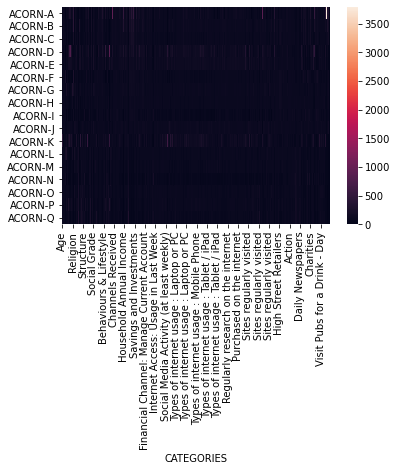

In [119]:
sns.heatmap(acorn_props_t)
#for_heat_mean = acorn_props_t.set_index('Mean')
#sns.heatmap(for_heat_mean)